In [1]:
print(ord("P") % 5 + 1)

1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

print("First 8 rows of the dataset:")
df.head(8)

First 8 rows of the dataset:


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [3]:
print("\nLast 8 rows of the dataset:")
df.tail(8)


Last 8 rows of the dataset:


,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
print("\nNames of dataset columns:")
df.columns


Names of dataset columns:


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [5]:
unique_names_count = df['Name'].nunique()
print("\nNumber of unique names in the dataset:")
unique_names_count


Number of unique names in the dataset:


93889

In [6]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
unique_names_per_year.reset_index().head()


,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158


In [7]:
year_most_unique_names = unique_names_per_year.idxmax()
most_unique_names_count = unique_names_per_year.max()

print(f"Number of unique names in {year_most_unique_names} year:")
most_unique_names_count

Number of unique names in 2008 year:


32488

In [8]:
year_with_most_unique_names = unique_names_per_year.idxmax()
df_most_unique_year = df[df['Year'] == year_with_most_unique_names]
most_popular_name = df_most_unique_year.groupby('Name')['Count'].sum().idxmax()
most_popular_name


'Jacob'

In [9]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
jacob_female_popularity_per_year = jacob_female.groupby('Year')['Count'].sum()
year_jacob_female_popular = jacob_female_popularity_per_year.idxmax()
jacob_female_most_popular_year = jacob_female[jacob_female['Year'] == year_jacob_female_popular]
jacob_female_most_popular_year


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [10]:
gender_neutral = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_filtered = gender_neutral[gender_neutral > 1].reset_index()
gender_neutral_per_year = gender_neutral_filtered.groupby('Year')['Name'].count()
year_most_gender_neutral = gender_neutral_per_year.idxmax()
gender_neutral_count = gender_neutral_per_year.max()

print(f"The year with the most gender-neutral names is {year_most_unique_names}, number of gender neutral names:")
gender_neutral_count


The year with the most gender-neutral names is 2008, number of gender neutral names:


2557

In [11]:
total_births_per_year = df.groupby('Year')['Count'].sum()
total_births_df = total_births_per_year.reset_index()
total_births_df.head()



,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


In [12]:
total_births_per_year = df.groupby('Year')['Count'].sum()
year_greatest_births = total_births_per_year.idxmax()
year_greatest_births

1957

In [13]:
births_per_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
births_per_gender_per_year.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [14]:
births_per_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_girls = (births_per_gender_per_year['F'] > births_per_gender_per_year['M']).sum()
years_more_girls

54

In [15]:
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]
total_boys_named_barbara = boys_named_barbara['Count'].sum()
total_boys_named_barbara

4139

In [16]:
years_observed = df['Year'].nunique()
print(f'The observation was carried out for {years_observed} years')

The observation was carried out for 135 years


In [17]:
gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names = gender_counts[gender_counts > 1].reset_index()
names_present_each_year = gender_neutral_names.groupby('Name')['Year'].nunique()
total_years = df['Year'].nunique()
most_popular_gender_neutral_names = names_present_each_year[names_present_each_year == total_years].reset_index()
most_popular_gender_neutral_names = most_popular_gender_neutral_names[['Name']]
most_popular_gender_neutral_names


,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [18]:
name_popularity = df.groupby('Name')['Count'].sum()
most_unpopular_name = name_popularity.idxmin()
most_unpopular_count = name_popularity.min()

print(f"{most_unpopular_name} is the most popular unpopular name. This name was given to babies {most_unpopular_count}")


Aabid is the most popular unpopular name. This name was given to babies 5


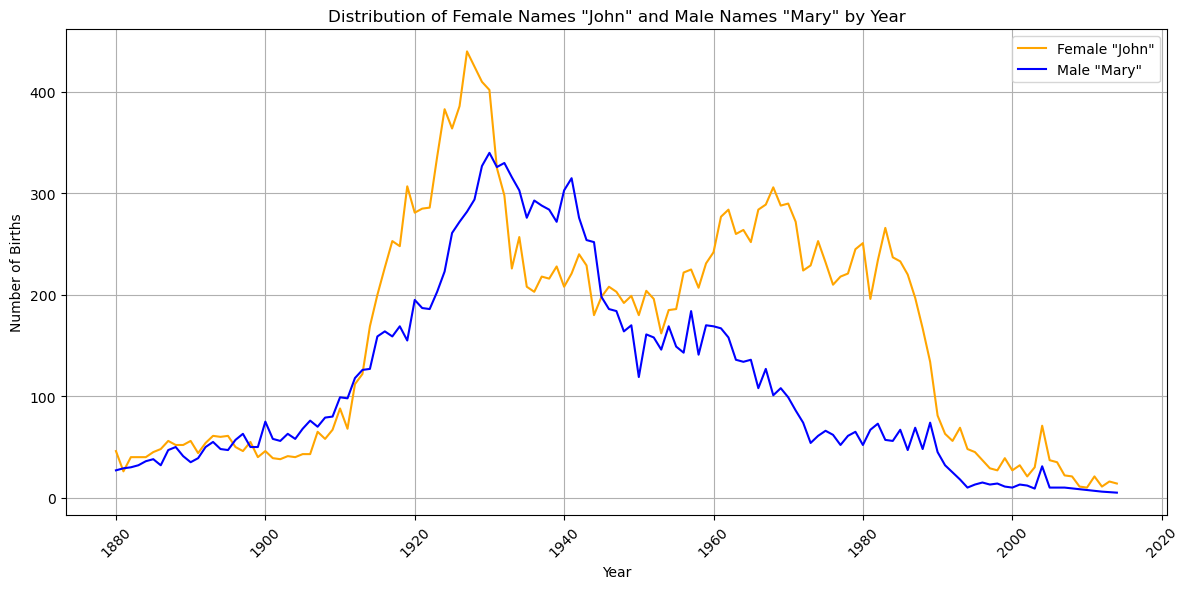

In [19]:
female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
female_john_by_year = female_john.groupby('Year')['Count'].sum()
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]
male_mary_by_year = male_mary.groupby('Year')['Count'].sum()
plt.figure(figsize=(12, 6))
plt.plot(female_john_by_year.index, female_john_by_year.values, marker='', label='Female "John"', color='orange')
plt.plot(male_mary_by_year.index, male_mary_by_year.values, marker='', label='Male "Mary"', color='blue')
plt.title('Distribution of Female Names "John" and Male Names "Mary" by Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()